<a href="https://colab.research.google.com/github/mohamadga04/Oil-and-Gas-Data-Analysis/blob/main/Machine%20Learning%20for%20Permeability%20Prediction%20Using%20Well%20Logs%20%26%20Facies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Assignment of Mohammed Subhi || Student at University of Mosul

##This notebook is an assignment for the AGRC Geological Modeling Program.

Permeability estimation is crucial in petrophysics, but acquiring cores for every interval is expensive. Estimating permeability in non-cored intervals is a critical challenge in reservoir characterization.

Accurate permeability estimation directly impacts on :


> Reservoir heterogeneity and behavior

> Enabling realistic simulations

> Better well design

> Informed decisions during field development

By leveraging advanced machine learning techniques, the notebook aims to provide efficient and accurate permeability estimates.

The notebook bridges the gap between costly core analysis and non-cored intervals, utilizing tailored machine learning algorithms for accurate permeability estimation.

##Importing Important Libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import norm
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

##Upload & Explore our data

In [3]:
df=pd.read_csv('karpur.csv')
df.head()

depth  caliper  ind.deep  ind.med   gamma  phi.N  R.deep  R.med      SP  \
0  5667.0    8.685   618.005  569.781  98.823  0.410   1.618  1.755 -56.587   
1  5667.5    8.686   497.547  419.494  90.640  0.307   2.010  2.384 -61.916   
2  5668.0    8.686   384.935  300.155  78.087  0.203   2.598  3.332 -55.861   
3  5668.5    8.686   278.324  205.224  66.232  0.119   3.593  4.873 -41.860   
4  5669.0    8.686   183.743  131.155  59.807  0.069   5.442  7.625 -34.934   

   density.corr  density  phi.core     k.core Facies  
0        -0.033    2.205   33.9000  2442.5901     F1  
1        -0.067    2.040   33.4131  3006.9888     F1  
2        -0.064    1.888   33.1000  3370.0000     F1  
3        -0.053    1.794   34.9000  2270.0000     F1  
4        -0.054    1.758   35.0644  2530.7581     F1

In [4]:
# let’s explore our data through basic statistics
df.describe().transpose()

count         mean          std       min         25%  \
depth         819.0  5873.057998   120.091932  5667.000  5769.25000   
caliper       819.0     8.621830     0.109654     8.487     8.55600   
ind.deep      819.0   275.357364   254.295493     6.532    28.79900   
ind.med       819.0   273.356971   243.342821     9.386    27.89150   
gamma         819.0    53.423632    18.944635    16.736    40.89400   
phi.N         819.0     0.221293     0.073420     0.015     0.20300   
R.deep        819.0    24.500795    35.157517     1.300     1.76450   
R.med         819.0    21.195916    27.536886     1.340     1.83700   
SP            819.0   -30.976579    16.654031   -73.950   -42.01100   
density.corr  819.0    -0.008883     0.016956    -0.067    -0.01600   
density       819.0     2.101756     0.125089     1.758     2.02300   
phi.core      819.0    26.933251     4.565335    15.700    23.90000   
k.core        819.0  2251.904640  2235.609308     0.420   657.33115   

                    50%        75%        max  
depth         5871.5000  5977.2500   6083.000  
caliper          8.5880     8.6860      8.886  
ind.deep       217.8490   566.7935    769.484  
ind.med        254.3830   544.2320    746.028  
gamma           51.3660    62.3705    112.397  
phi.N            0.2450     0.2640      0.410  
R.deep           4.5900    34.7235    153.085  
R.med            3.9310    35.8535    106.542  
SP             -32.2500   -19.4760     25.128  
density.corr    -0.0070     0.0020      0.089  
density          2.0990     2.1810      2.387  
phi.core        27.6000    30.7000     36.300  
k.core        1591.2185  3046.8193  15600.000

In [5]:
# Show the coloumns of the data
df.columns

Index(['depth', 'caliper', 'ind.deep', 'ind.med', 'gamma', 'phi.N', 'R.deep',
       'R.med', 'SP', 'density.corr', 'density', 'phi.core', 'k.core',
       'Facies'],
      dtype='object')

In [6]:
# Separate features and target
features = df.drop('k.core', axis=1)  # Excluding the permeability column
target = df['k.core']
# Convert categorical facies data to numerical labels
label_encoder = LabelEncoder()
features['Facies'] = label_encoder.fit_transform(features['Facies'])

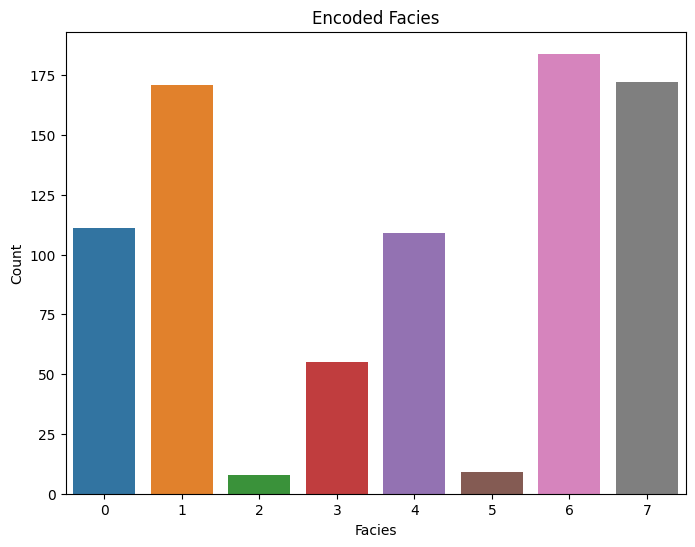

In [7]:
# Plot the encoded facies
plt.figure(figsize=(8, 6))
sns.countplot(data=features, x='Facies')
plt.title("Encoded Facies")
plt.xlabel("Facies")
plt.ylabel("Count")
plt.show()

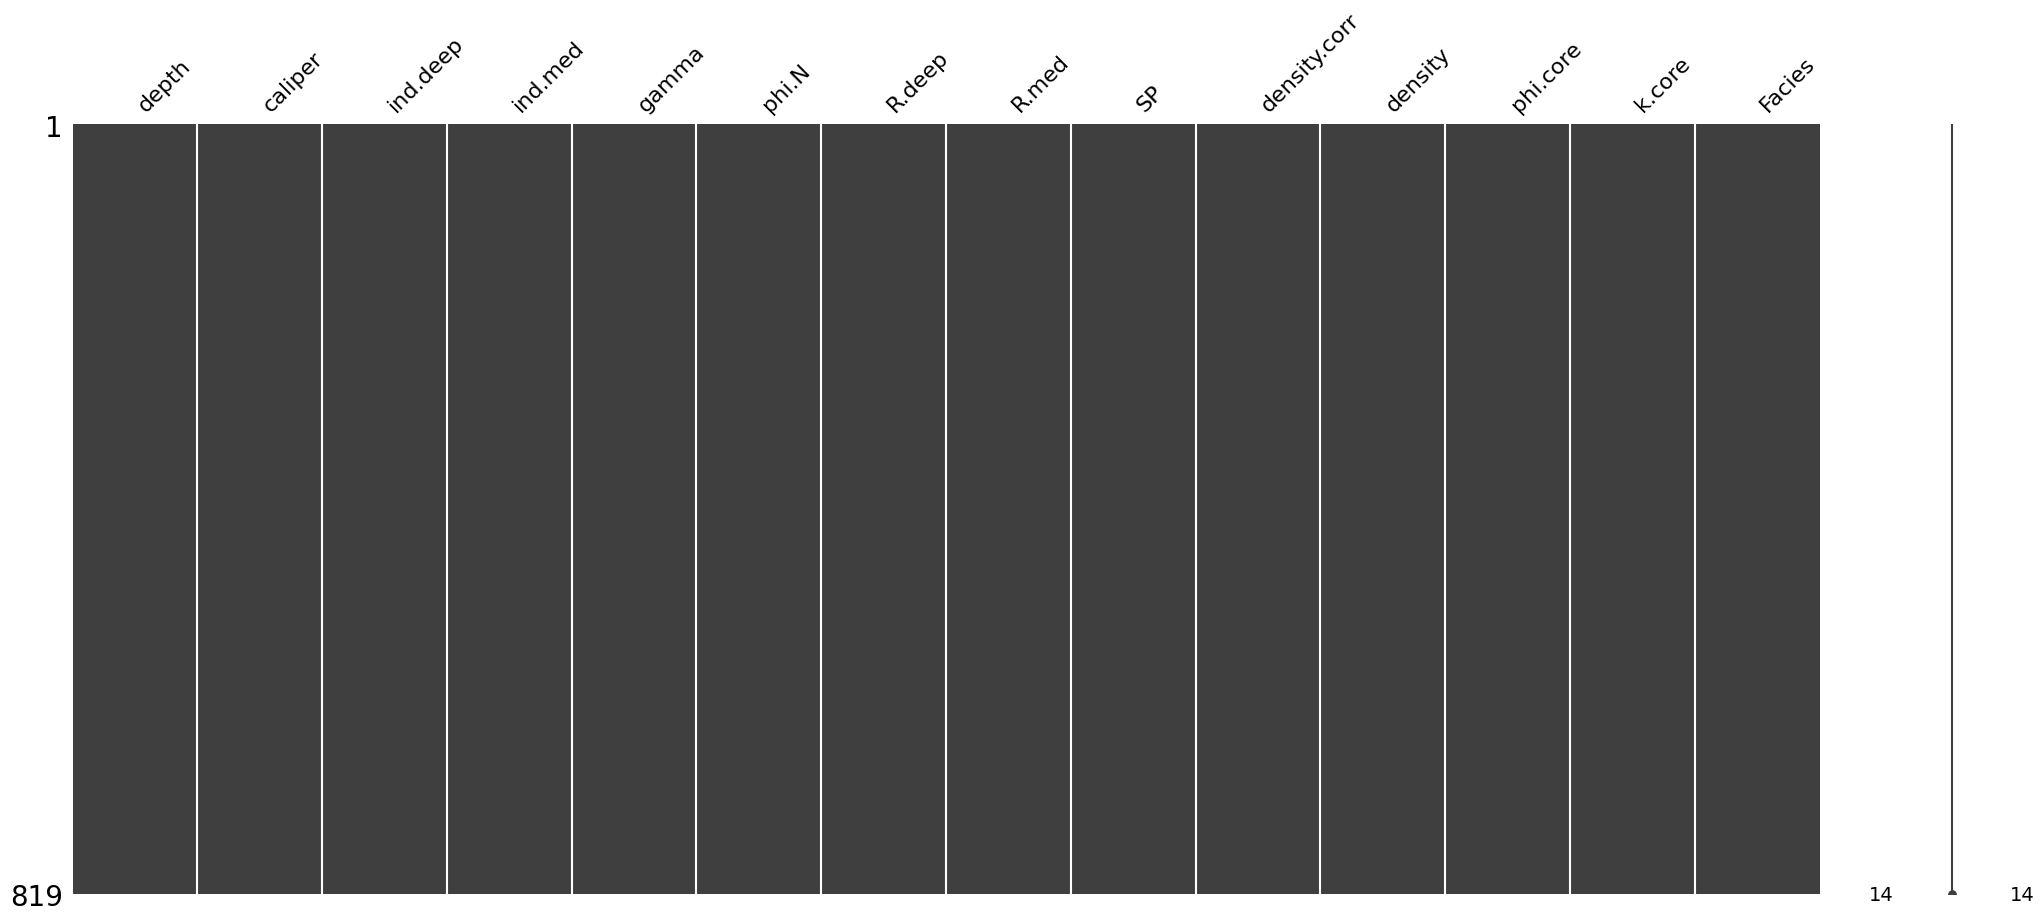

In [8]:
# Visualize missing values
msno.matrix(df)
plt.show()

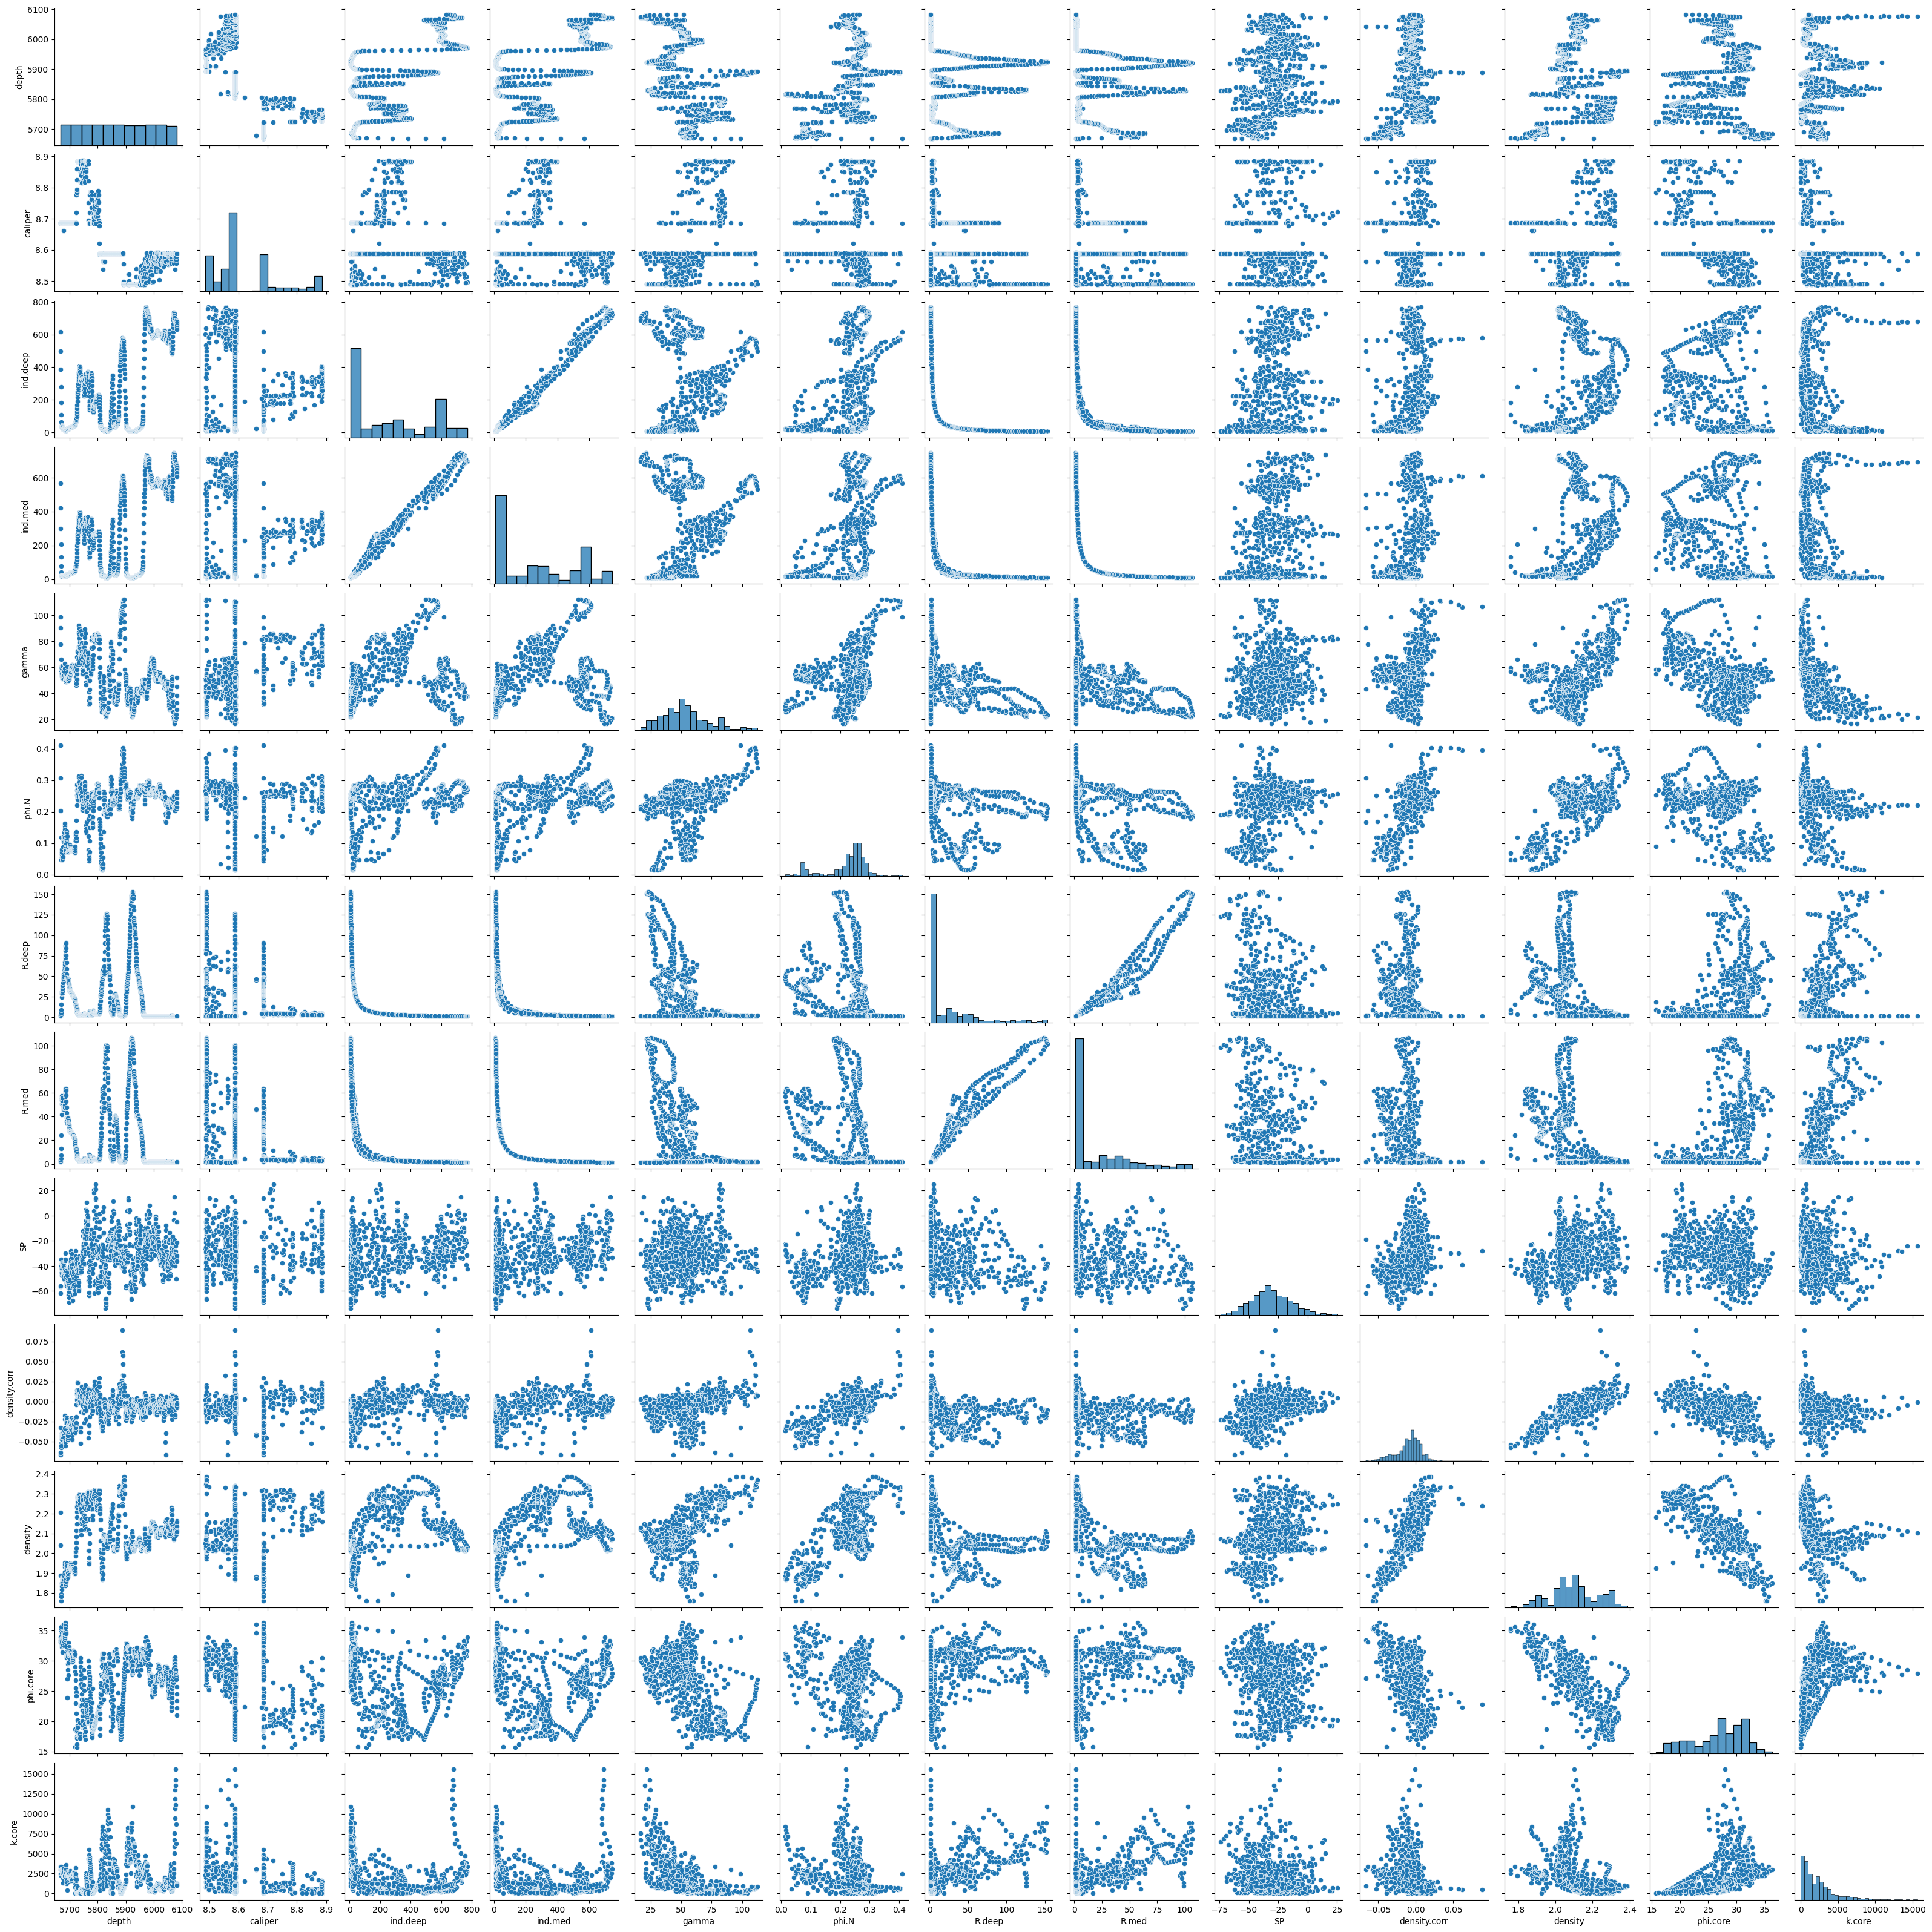

In [9]:
sns.pairplot(df)

<ipython-input-11-0b365e234ffd>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


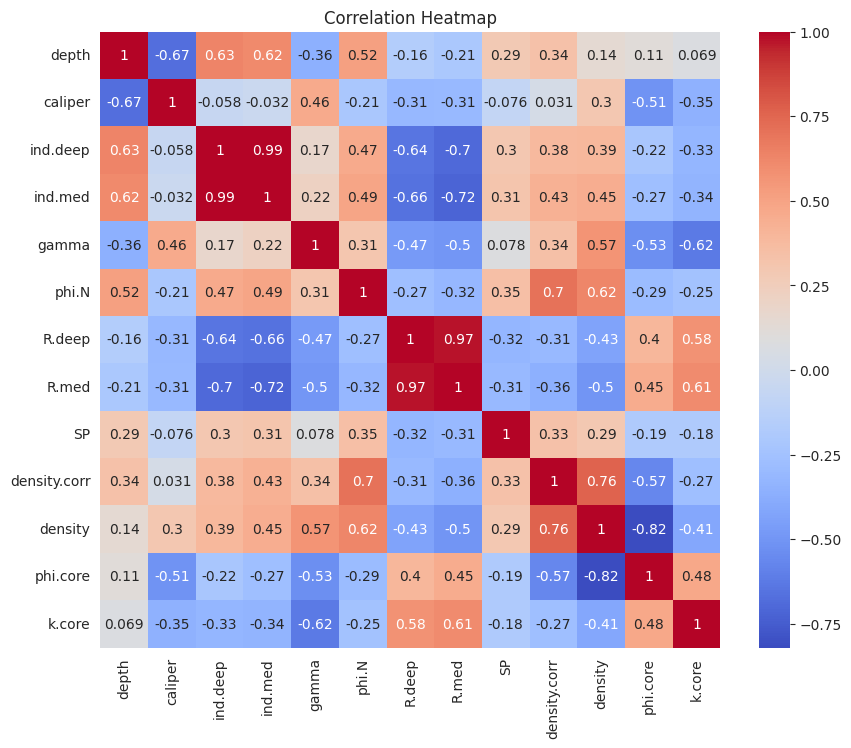

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

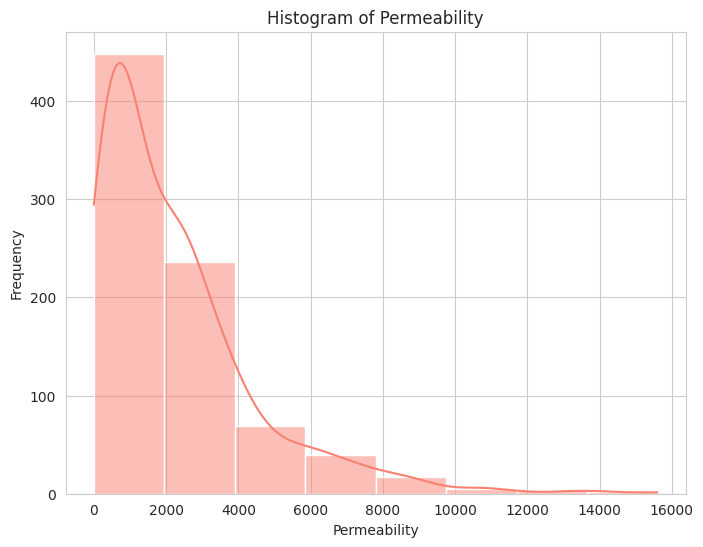

In [10]:
# Set the style of the plot
sns.set_style("whitegrid")

# Histogram of 'k.core' column with color gradient
plt.figure(figsize=(8, 6))
sns.histplot(df['k.core'], bins=8, kde=True, color='salmon')
plt.title('Histogram of Permeability')
plt.xlabel('Permeability')
plt.ylabel('Frequency')
plt.show()

--------------------------------------------------
Multi-Linear Regression R-squared: 0.5713305552558283
--------------------------------------------------


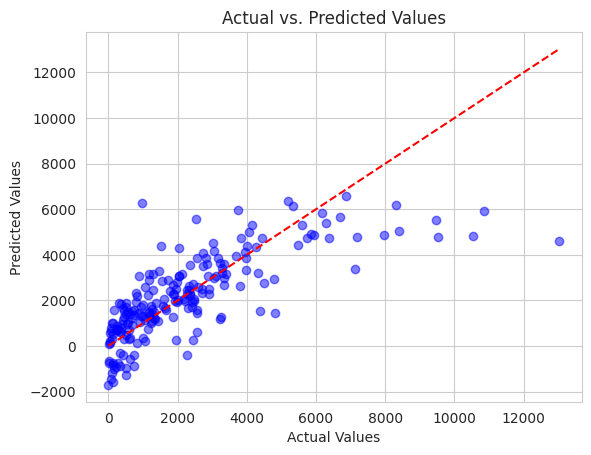

In [45]:
# Separate features and target
features = df[['caliper', 'ind.deep', 'ind.med', 'gamma', 'phi.N', 'R.deep', 'R.med',
       'SP', 'density.corr', 'density', 'phi.core'] ] # Selected features
target = df['k.core']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)

# Create and train the multi-linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Calculate the R-squared on the test set
r_squared = mlr_model.score(X_test, y_test)

# Print the R-squared
print("--------------------------------------------------")
print("Multi-Linear Regression R-squared:", r_squared)
print("--------------------------------------------------")
# Predict on the test set
y_pred = mlr_model.predict(X_test)
# Create a scatter plot to compare actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

As we see that the multi-linear regression(mlr) model has weak accuracy, this is beacuse mlr is senstive to non normal distribution data.
lets try to transform data into normal distribution


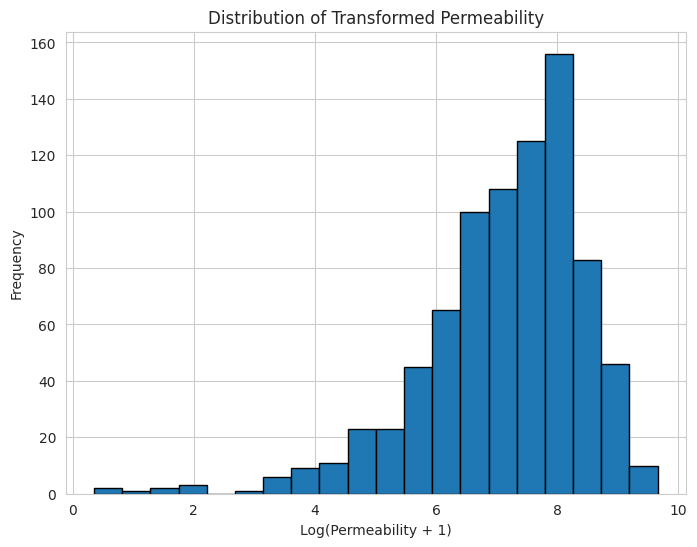

In [58]:
# Apply logarithmic transformation to permeability
df['k.core_transformed'] = np.log1p(df['k.core'])

# Plot the distribution of transformed permeability
plt.figure(figsize=(8, 6))
plt.hist(df['k.core_transformed'], bins=20, edgecolor='black')
plt.xlabel('Log(Permeability + 1)')
plt.ylabel('Frequency')
plt.title('Distribution of Transformed Permeability')
plt.show()

--------------------------------------------------
Multi-Linear Regression R-squared: 1.0
--------------------------------------------------


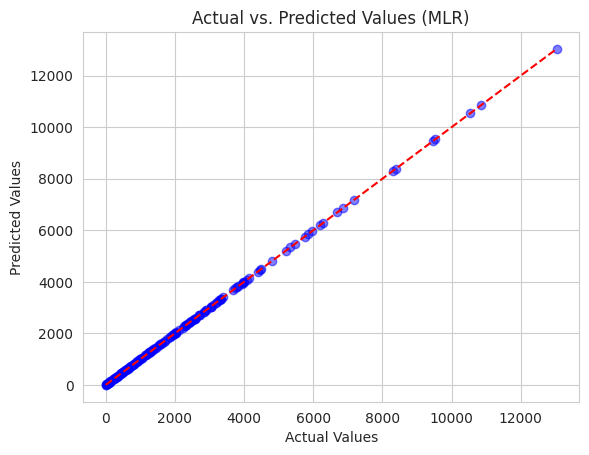

In [68]:
# Separate features and target
features = df[['caliper', 'ind.deep', 'ind.med', 'gamma', 'phi.N', 'R.deep', 'R.med',
       'SP', 'density.corr', 'density', 'phi.core', 'k.core_transformed' ] ] # Selected features
target =df['k.core_transformed'] = np.log1p(df['k.core'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

# Create and train the multi-linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
# Predict on the test set
y_pred = mlr_model.predict(X_test)
# Calculate the R-squared on the test set
r_squared = mlr_model.score(X_test, y_test)
# Print the R-squared
print("--------------------------------------------------")
print("Multi-Linear Regression R-squared:", r_squared)
print("--------------------------------------------------")
# Create a scatter plot to compare actual vs. predicted values
plt.scatter(np.expm1(y_test), np.expm1(y_pred), color='blue', alpha=0.5)
plt.plot([min(np.expm1(y_test)), max(np.expm1(y_test))], [min(np.expm1(y_test)), max(np.expm1(y_test))], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

--------------------------------------------------
Multi-Linear Regression R-squared: 0.9991565937722717
--------------------------------------------------


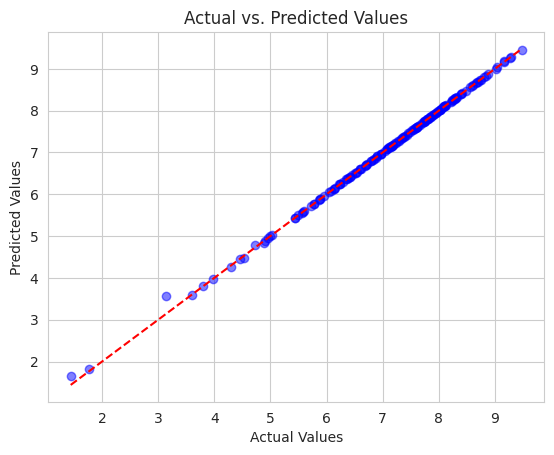

In [69]:
# Create and train the random forest regression model
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Calculate the R-squared on the test set
r_squared_rf = rf_model.score(X_test, y_test)
# Print the R-squared
print("--------------------------------------------------")
print("Multi-Linear Regression R-squared:", r_squared_rf)
print("--------------------------------------------------")
# Predict on the test set
y_pred = rf_model.predict(X_test)
# Create a scatter plot to compare actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

--------------------------------------------------
Multi-Linear Regression R-squared: 0.9994357166419299
--------------------------------------------------


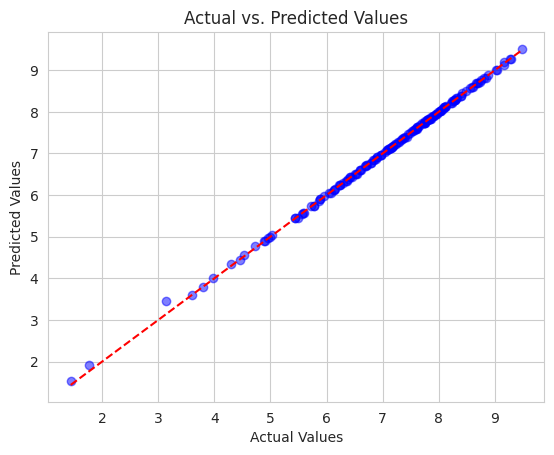

In [70]:
# Create and train the gradient boosting regression model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Calculate the R-squared on the test set
r_squared_gb = gb_model.score(X_test, y_test)
# Print the R-squared
print("--------------------------------------------------")
print("Multi-Linear Regression R-squared:", r_squared_gb)
print("--------------------------------------------------")
# Predict on the test set
y_pred = gb_model.predict(X_test)
# Create a scatter plot to compare actual vs. predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()